In [6]:
from ase.build import bulk, make_supercell
from ase.io.vasp import write_vasp
from ase.io.lammpsdata import write_lammps_data


def hcp_gen():
    struc = bulk("Zr", "hcp", a=3.324, c=5.168, orthorhombic=False)
    struc_orth = bulk("Zr", "hcp", a=3.324, c=5.168, orthorhombic=True)
    print(struc)

    write_vasp("POSCAR", struc, direct=True, sort=True)
    write_vasp("POSCAR_orth", struc_orth, direct=True, sort=True)
    write_lammps_data(
        "data.pos", struc, units="metal", atom_style="atomic"
    )  # 没有写入质量mass信息


if __name__ == "__main__":
    hcp_gen()

Atoms(symbols='Zr2', pbc=True, cell=[[3.324, 0.0, 0.0], [-1.662, 2.8786684421794737, 0.0], [0.0, 0.0, 5.168]])


In [2]:
from ase import Atoms
from ase.visualize import view

d = 1.10
molecule = Atoms(["N", "N"], positions=[(0.0, 0.0, 0.0), (0.0, 0.0, d)])

view(molecule, viewer="ngl")

In [1]:
from ase import Atoms
from ase.visualize import view

a = 5.387
crystal = Atoms(
    "Zn4S4",
    scaled_positions=[
        [0.0, 0.0, 0.0],
        [0.0, 0.5, 0.5],
        [0.5, 0.0, 0.5],
        [0.5, 0.5, 0.0],
        [0.25, 0.75, 0.75],
        [0.25, 0.25, 0.25],
        [0.75, 0.75, 0.25],
        [0.75, 0.25, 0.75],
    ],
    cell=[a, a, a],
    pbc=True,
)

view(crystal, viewer="ngl")

In [3]:
%%bash 

wget https://raw.githubusercontent.com/ASE-Workshop-2023/tutorial/gh-pages/data/ZnS.cif

--2023-12-16 20:06:27--  https://raw.githubusercontent.com/ASE-Workshop-2023/tutorial/gh-pages/data/ZnS.cif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1152 (1.1K) [text/plain]
Saving to: ‘ZnS.cif’

     0K .                                                     100%  119M=0s

2023-12-16 20:06:28 (119 MB/s) - ‘ZnS.cif’ saved [1152/1152]



/home/yangsl/src/miniconda3/envs/base_ysl/lib/python3.11/site-packages/ase/visualize/plot.py:59: UserWarning: You passed in an explicit save_count=100 which is being ignored in favor of len(frames)=10.
  animation = FuncAnimation(fig, drawimage, frames=images,
MovieWriter ffmpeg unavailable; using Pillow instead.


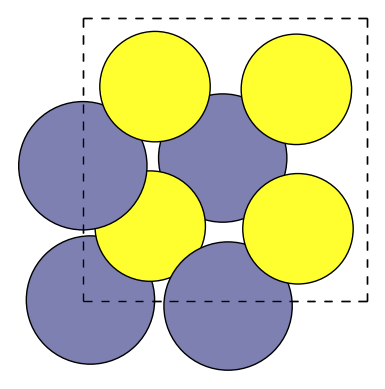

In [7]:
import ase.io
from pathlib import Path
from ase.visualize import view

imported_crystal = ase.io.read("./ZnS.cif", format="cif")

atoms = imported_crystal

atoms_sequence = []
num_frames = 10

for frame in range(num_frames):
    atoms.rattle(stdev=0.02, seed=frame)  # rattle modifies the atoms in-place
    atoms_sequence.append(atoms.copy())

ase.io.write("ZnS_rattle.xyz", atoms_sequence, format="extxyz")
ase.io.write("rattle.gif", atoms_sequence)

view(atoms_sequence, viewer="ngl")

In [8]:
view(ase.build.molecule("C60"), viewer="ngl")

In [9]:
view(ase.build.bulk("Cu", cubic=True), viewer="ngl")

In [10]:
view(
    ase.build.bulk("ZnS", crystalstructure="zincblende", a=5.387, cubic=True),
    viewer="ngl",
)

In [11]:
si = ase.build.bulk("Si", cubic=True)
view(si, viewer="ngl")

In [12]:
view(si * 4, viewer="ngl")

In [13]:
si_prime = ase.build.bulk("Si")
view(si_prime, viewer="ngl")

In [16]:
optimal_array = ase.build.find_optimal_cell_shape(si_prime.cell, 2, "sc", verbose=True)

target metric (h_target):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
normalization factor (Q): 0.23203
idealized transformation matrix:
[[-0.79370053  0.79370053  0.79370053]
 [ 0.79370053 -0.79370053  0.79370053]
 [ 0.79370053  0.79370053 -0.79370053]]
closest integer transformation matrix (P_0):
[[-1  1  1]
 [ 1 -1  1]
 [ 1  1 -1]]
smallest score (|Q P h_p - h_target|_2): 0.817861
optimal transformation matrix (P_opt):
[[-1  0  1]
 [ 1 -1  1]
 [ 1  1 -1]]
supercell metric:
[[ 2.715  0.    -2.715]
 [ 0.     5.43   0.   ]
 [ 0.     0.     5.43 ]]
determinant of optimal transformation matrix: 2


In [17]:
cubic_Si_expansion = ase.build.make_supercell(si_prime, optimal_array)
view(cubic_Si_expansion, viewer="ngl")

In [18]:
from ase.build import bulk

crystal = bulk("ZnS", crystalstructure="zincblende", a=5.387, cubic=True)

In [21]:
zinc_indices = [i for i, atom in enumerate(crystal) if atom.symbol == "Zn"]
zinc_sublattice = crystal[zinc_indices]
view(zinc_sublattice, viewer="ngl")

In [22]:
from ase import Atom

composite = zinc_sublattice.copy()
composite.append(Atom("He", position=(1.34675, 4.04025, 4.04025)))
view(composite, viewer="ngl")

In [19]:
zinc_vacancy = crystal.copy()
del zinc_vacancy[0]
view(zinc_vacancy, viewer="ngl")

In [26]:
antisite = crystal.copy()
antisite.positions[[0, 1]] = antisite.positions[[1, 0]]
view(antisite, viewer="ngl")

In [27]:
sulfur_indices = [i for i, atom in enumerate(crystal) if atom.symbol == "S"]
sulfur_sublattice = crystal[sulfur_indices]
sulfur_sublattice.translate([0.3, 0.0, 0.0])
view(zinc_sublattice + sulfur_sublattice, viewer="ngl")

In [28]:
from ase import Atoms
from ase.calculators.emt import EMT
from ase.visualize import view


def make_wire(spacing: float = 2.5, box_size: float = 10.0) -> Atoms:
    wire = Atoms(
        "Au",
        positions=[[0.0, box_size / 2, box_size / 2]],
        cell=[spacing, box_size, box_size],
        pbc=[True, False, False],
    )
    return wire


atoms = make_wire()
view(atoms, viewer="ngl")

In [35]:
atoms.calc = EMT()

energy = atoms.get_potential_energy()
print(f"Energy: {energy} eV")

print("Forces: ")
print(atoms.get_forces())

print("Stress: ")
print(atoms.get_stress())

print(EMT.implemented_properties)

properties = atoms.get_properties(['energy', 'forces', 'stress'])
print(properties)

Energy: 0.9910548478768826 eV
Forces: 
[[0. 0. 0.]]
Stress: 
[ 0.00396458 -0.         -0.         -0.         -0.         -0.        ]
['energy', 'energies', 'forces', 'stress', 'magmom', 'magmoms']
(Properties({'energy': 0.9910548478768826, 'natoms': 1, 'energies': array([0.99105485]), 'free_energy': 0.9910548478768826, 'forces': array([[0., 0., 0.]]), 'stress': array([ 0.00396458, -0.        , -0.        , -0.        , -0.        ,
       -0.        ])})


In [30]:
import numpy as np
distances = np.linspace(2., 3., 21)

def get_energy(spacing: float) -> float:
    atoms = make_wire(spacing=spacing)
    atoms.calc = EMT()
    return atoms.get_potential_energy()

energies = list(map(get_energy, distances))

In [31]:
from numpy.polynomial import Polynomial
fit = Polynomial.fit(distances, energies, 3)

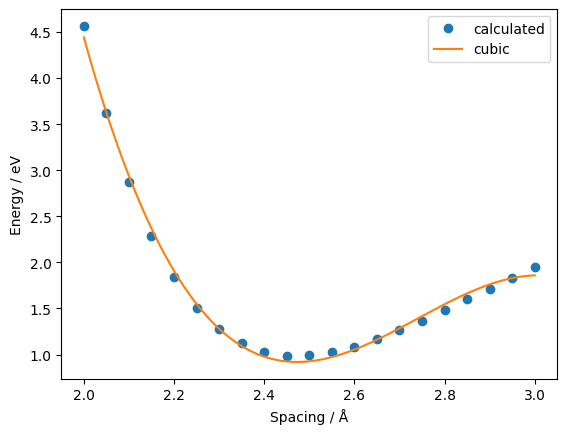

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = np.linspace(2., 3., 500)

_ = ax.plot(distances, energies, 'o', label='calculated')
_ = ax.plot(x, fit(x), '-', label='cubic')
_ = ax.legend()
_ = ax.set_xlabel('Spacing / Å')
_ = ax.set_ylabel('Energy / eV')

In [36]:
from ase.calculators.lj import LennardJones

l = 4.1
atoms = Atoms('Xe2',
              positions=[[0., 0., -l / 2],
                         [0., 0., l / 2]],
              pbc=False)
atoms.calc = LennardJones(sigma=(4.1 / 2**(1/6)))

atoms.get_forces()

array([[ 0.00000000e+00,  0.00000000e+00, -6.49886649e-16],
       [ 0.00000000e+00,  0.00000000e+00,  6.49886649e-16]])